In [2]:
# Lire les données téléchargés de Yahoo Finance - pour AMD
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# La Date doit être traité comme un Index, pas comme une colonne
amd = pd.read_csv('Documents/Bourse/AMD.csv', header = 0, index_col = 'Date', parse_dates = True)
ibm = pd.read_csv('Documents/Bourse/IBM.csv', header = 0, index_col = 'Date', parse_dates = True)
intc = pd.read_csv('Documents/Bourse/INTC.csv', header = 0, index_col = 'Date', parse_dates = True)
nvda = pd.read_csv('Documents/Bourse/NVDA.csv', header = 0, index_col = 'Date', parse_dates = True)
qcom = pd.read_csv('Documents/Bourse/QCOM.csv', header = 0, index_col = 'Date', parse_dates = True)
dji = pd.read_csv('Documents/Bourse/DJI.csv', header = 0, index_col = 'Date', parse_dates = True)

In [4]:
# Un résumé
ibm.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,138.438016,139.463810,137.232698,138.387818,135.167406,4.144848e+06
std,6.550096,6.664584,6.932232,6.802246,6.649464,2.555711e+06
min,108.680000,109.160004,100.809998,102.809998,102.809998,1.202100e+06
25%,134.477497,135.307499,133.430000,134.317505,131.841644,2.749625e+06
50%,138.150002,139.305001,137.565002,138.154999,134.015442,3.289200e+06
75%,142.347500,143.030003,141.040001,142.110001,138.057807,4.501025e+06
max,156.820007,158.750000,155.419998,156.759995,155.309998,1.899460e+07


In [5]:
# Les colonnes
nvda.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
# Le Index
amd.index

DatetimeIndex(['2019-03-15', '2019-03-18', '2019-03-19', '2019-03-20',
               '2019-03-21', '2019-03-22', '2019-03-25', '2019-03-26',
               '2019-03-27', '2019-03-28',
               ...
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-09', '2020-03-10', '2020-03-11',
               '2020-03-12', '2020-03-13'],
              dtype='datetime64[ns]', name='Date', length=252, freq=None)

In [7]:
# La forme
qcom.shape

(252, 6)

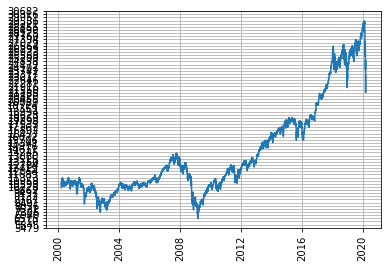

In [18]:
# Nous allons créer un plot des données
plt.plot(dji.index, dji['Adj Close'])
# Voir chaque année, les données sont organisées par année
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().yaxis.set_major_locator(mdates.YearLocator())
# Montrer une grille pour mieux visualiser l'information
plt.grid(True)
# Les donnnées - l'ax x - est difficile à lire, pour cette raison, nous ajoutons xticks 90 dégrés
plt.xticks(rotation=90)
plt.show()

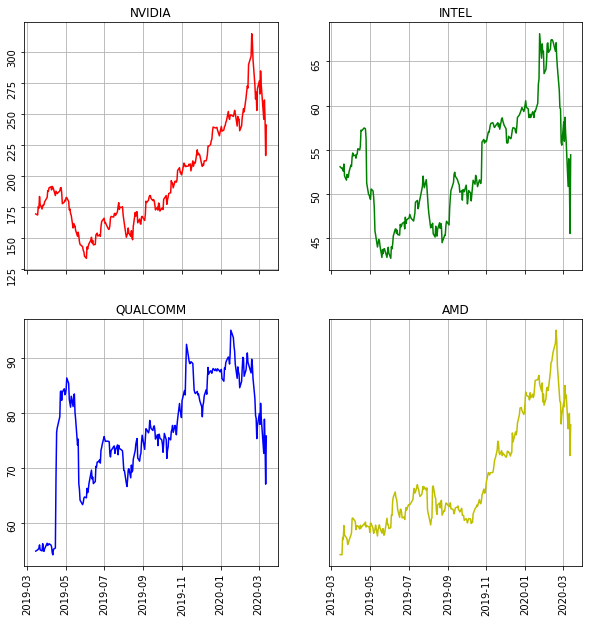

In [20]:
# Nous allons créer les plots pour toutes les entreprises
# 2 lignes par 2 colonnes avec une taille de 10x10 et ils partagent le x axis

f, ax = plt.subplots(2, 2, figsize = (10, 10), sharex = True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().yaxis.set_major_locator(mdates.YearLocator())

# Le plot pour NVIDIA
ax[0,0].plot(nvda.index, nvda['Adj Close'], color = 'r')
ax[0,0].grid(True)
# Similaire à xticks
ax[0,0].tick_params(labelrotation = 90)
ax[0,0].set_title('NVIDIA');

# Le plot pour Intel
ax[0,1].plot(intc.index, intc['Adj Close'], color = 'g')
ax[0,1].grid(True)
# Similaire à xticks
ax[0,1].tick_params(labelrotation = 90)
ax[0,1].set_title('INTEL');

# Le plot pour Qualcomm
ax[1,0].plot(qcom.index, qcom['Adj Close'], color = 'b')
ax[1,0].grid(True)
# Similaire à xticks
ax[1,0].tick_params(labelrotation = 90)
ax[1,0].set_title('QUALCOMM');

# Le plot pour AMD
ax[1,1].plot(amd.index, amd['Adj Close'], color = 'y')
ax[1,1].grid(True)
# Similaire à xticks
ax[1,1].tick_params(labelrotation = 90)
ax[1,1].set_title('AMD');

## Resampling

### Le Resampling consiste à modifier la fréquence de nos observations TimeSeries. Nous avons deux types de Resampling : 1) Down-sampling : diminuer le nombre d'échantillons (jours à mois), 2) Up-sampling : augmenter le nombre d'échantillons (minutes à secondes).

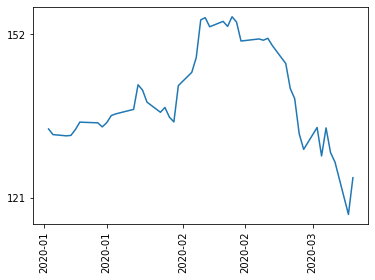

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,135.000000,135.919998,134.770004,135.419998,134.020538,3148600
2020-01-03,133.570007,134.860001,133.559998,134.339996,132.951691,2373700
2020-01-06,133.419998,134.240005,133.199997,134.100006,132.714188,2425500
2020-01-07,133.690002,134.960007,133.399994,134.190002,132.803253,3090800
2020-01-08,134.509995,135.860001,133.919998,135.309998,133.911667,4346000


In [6]:
# Nous allons faire un Zoom dans le DataSet

ibm_20 = ibm.loc[pd.Timestamp('2020-01-01'):pd.Timestamp('2020-03-10')]
plt.plot(ibm_20.index, ibm_20['Adj Close'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().yaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=90)
plt.show()
ibm_20.head()

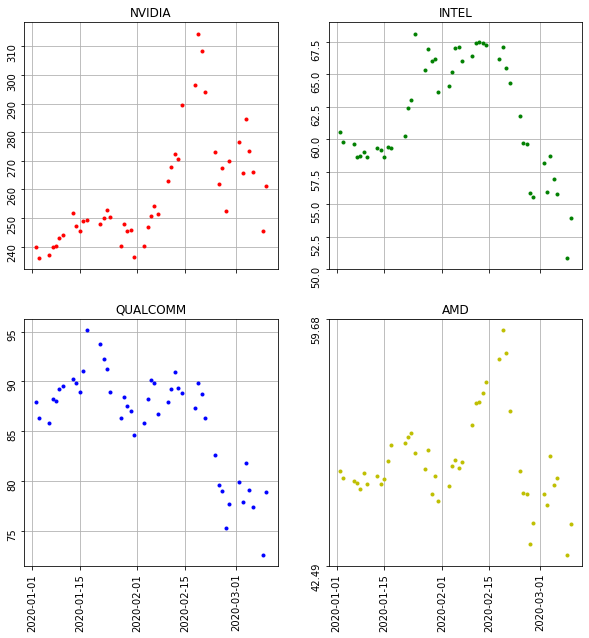

In [15]:
# Nous allons créer un subplot pour chaque entreprise

f, ax = plt.subplots(2, 2, figsize = (10, 10), sharex = True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().yaxis.set_major_locator(mdates.MonthLocator())

# Le plot pour NVIDIA
nvda_20 = nvda.loc[pd.Timestamp('2020-01-01'):pd.Timestamp('2020-03-10')]
ax[0,0].plot(nvda_20.index, nvda_20['Adj Close'], '.', color = 'r')
ax[0,0].grid(True)
# Similaire à xticks
ax[0,0].tick_params(labelrotation = 90)
ax[0,0].set_title('NVIDIA');

# Le plot pour Intel
intc_20 = intc.loc[pd.Timestamp('2020-01-01'):pd.Timestamp('2020-03-10')]
ax[0,1].plot(intc_20.index, intc_20['Adj Close'], '.', color = 'g')
ax[0,1].grid(True)
# Similaire à xticks
ax[0,1].tick_params(labelrotation = 90)
ax[0,1].set_title('INTEL');

# Le plot pour Qualcomm
qcom_20 = qcom.loc[pd.Timestamp('2020-01-01'):pd.Timestamp('2020-03-10')]
ax[1,0].plot(qcom_20.index, qcom_20['Adj Close'], '.', color = 'b')
ax[1,0].grid(True)
# Similaire à xticks
ax[1,0].tick_params(labelrotation = 90)
ax[1,0].set_title('QUALCOMM');

# Le plot pour AMD
amd_20 = amd.loc[pd.Timestamp('2020-01-01'):pd.Timestamp('2020-03-10')]
ax[1,1].plot(amd_20.index, amd_20['Adj Close'], '.', color = 'y')
ax[1,1].grid(True)
# Similaire à xticks
ax[1,1].tick_params(labelrotation = 90)
ax[1,1].set_title('AMD');

### Nous allons faire un resample par trimestre (Quarterly)

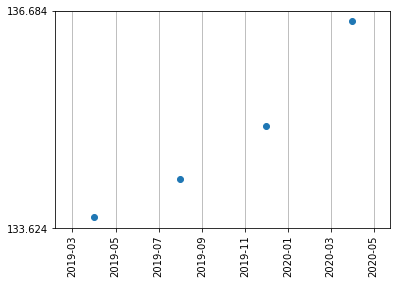

In [16]:
# Pour les 4 trimestres d'une année

monthly_ibm = ibm.resample('4M').mean()
plt.scatter(monthly_ibm.index, monthly_ibm['Adj Close'])
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().yaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=90)
plt.show()

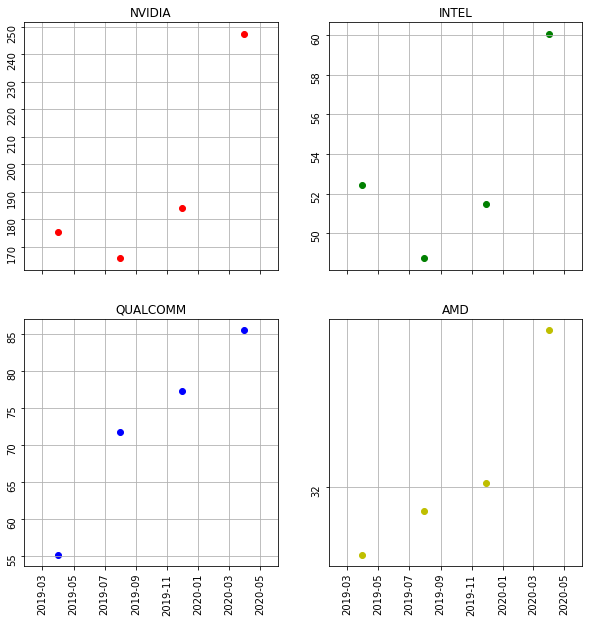

In [17]:
# Nous allons créer les subplots pour toutes les années

f, ax = plt.subplots(2, 2, figsize = (10, 10), sharex = True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().yaxis.set_major_locator(mdates.MonthLocator())

# Le plot pour NVIDIA
monthly_nvda = nvda.resample('4M').mean()
ax[0,0].scatter(monthly_nvda.index, monthly_nvda['Adj Close'], color = 'r')
ax[0,0].grid(True)
# Similaire à xticks
ax[0,0].tick_params(labelrotation = 90)
ax[0,0].set_title('NVIDIA');

# Le plot pour Intel
monthly_intc = intc.resample('4M').mean()
ax[0,1].scatter(monthly_intc.index, monthly_intc['Adj Close'], color = 'g')
ax[0,1].grid(True)
# Similaire à xticks
ax[0,1].tick_params(labelrotation = 90)
ax[0,1].set_title('INTEL');

# Le plot pour Qualcomm
monthly_qcom = qcom.resample('4M').mean()
ax[1,0].scatter(monthly_qcom.index, monthly_qcom['Adj Close'], color = 'b')
ax[1,0].grid(True)
# Similaire à xticks
ax[1,0].tick_params(labelrotation = 90)
ax[1,0].set_title('QUALCOMM');

# Le plot pour AMD
monthly_amd = amd.resample('4M').mean()
ax[1,1].scatter(monthly_amd.index, monthly_amd['Adj Close'], color = 'y')
ax[1,1].grid(True)
# Similaire à xticks
ax[1,1].tick_params(labelrotation = 90)
ax[1,1].set_title('AMD');

### Nous allons faire resample par semaine

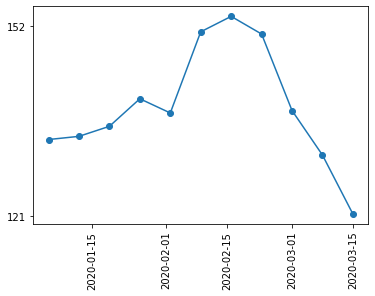

In [18]:
weekly_ibm = ibm_20.resample('W').mean()
plt.plot(weekly_ibm.index, weekly_ibm['Adj Close'], '-o')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().yaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=90)
plt.show()

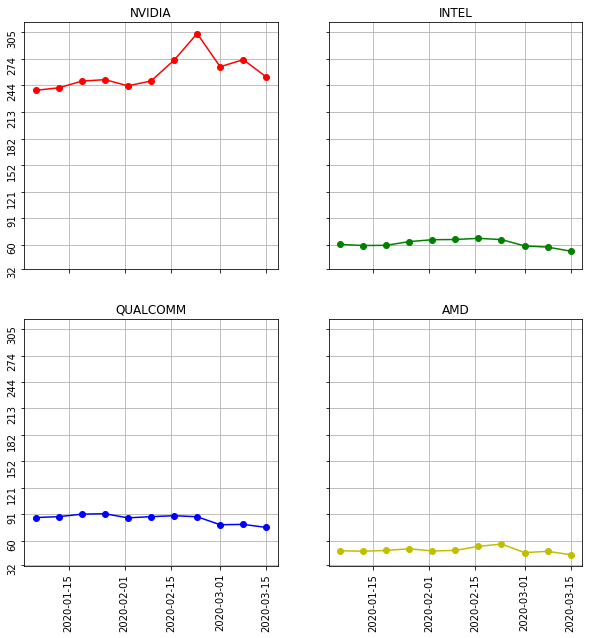

In [24]:
# Nous allons créer les subplots

f, ax = plt.subplots(2, 2, figsize = (10, 10), sharex = True, sharey = True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().yaxis.set_major_locator(mdates.MonthLocator())

# Le plot pour NVIDIA
weekly_nvda = nvda_20.resample('W').mean()
ax[0,0].plot(weekly_nvda.index, weekly_nvda['Adj Close'], '-o', color = 'r')
ax[0,0].grid(True)
# Similaire à xticks
ax[0,0].tick_params(labelrotation = 90)
ax[0,0].set_title('NVIDIA');

# Le plot pour Intel
weekly_intc = intc_20.resample('W').mean()
ax[0,1].plot(weekly_intc.index, weekly_intc['Adj Close'], '-o', color = 'g')
ax[0,1].grid(True)
# Similaire à xticks
ax[0,1].tick_params(labelrotation = 90)
ax[0,1].set_title('INTEL');

# Le plot pour Qualcomm
weekly_qcom = qcom_20.resample('W').mean()
ax[1,0].plot(weekly_qcom.index, weekly_qcom['Adj Close'], '-o', color = 'b')
ax[1,0].grid(True)
# Similaire à xticks
ax[1,0].tick_params(labelrotation = 90)
ax[1,0].set_title('QUALCOMM');

# Le plot pour AMD
weekly_amd = amd_20.resample('W').mean()
ax[1,1].plot(weekly_amd.index, weekly_amd['Adj Close'], '-o', color = 'y')
ax[1,1].grid(True)
# Similaire à xticks
ax[1,1].tick_params(labelrotation = 90)
ax[1,1].set_title('AMD');

### Analyse des différences entre les niveaux (resampling : par semaine)

In [25]:
ibm['diff'] = ibm['Open'] - ibm['Close']
ibm_diff = ibm.resample('W').mean()
ibm_diff.tail()

,Open,High,Low,Close,Adj Close,Volume,diff
Date,,,,,,,
2020-02-16,154.125998,154.930002,152.202002,153.645996,153.645996,4686520,0.480001
2020-02-23,150.794994,151.482498,149.574997,150.755001,150.755001,3123325,0.039993
2020-03-01,140.427997,141.792001,137.122000,138.229999,138.229999,7701020,2.197998
2020-03-08,130.801999,133.088000,127.543999,130.940001,130.940001,7012680,-0.138002
2020-03-15,116.456001,117.766002,110.501999,114.261998,114.261998,11124580,2.194003


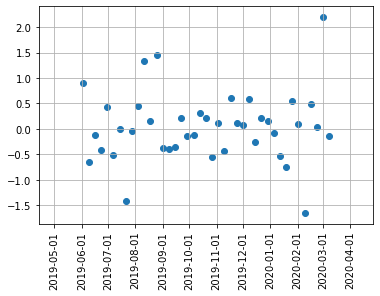

In [29]:
# Plot la différence
plt.scatter(ibm_diff.loc['2019-06-01':'2020-03-10'].index, ibm_diff.loc['2019-06-01':'2020-03-10']['diff'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

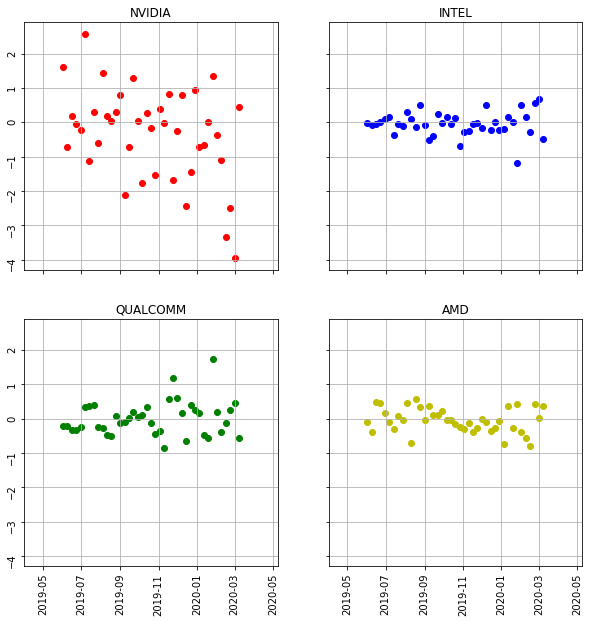

In [32]:
# Subplots

nvda['diff'] = nvda['Open'] - nvda['Close']
nvda_diff = nvda.resample('W').mean()

intc['diff'] = intc['Open'] - intc['Close']
intc_diff = intc.resample('W').mean()

qcom['diff'] = qcom['Open'] - qcom['Close']
qcom_diff = qcom.resample('W').mean()

amd['diff'] = amd['Open'] - amd['Close']
amd_diff = amd.resample('W').mean()

f, ax = plt.subplots(2, 2, figsize = (10, 10), sharex = True, sharey = True)

ax[0,0].scatter(nvda_diff.loc['2019-06-01':'2020-03-10'].index, nvda_diff.loc['2019-06-01':'2020-03-10']['diff'], color = 'r')
ax[0,0].grid(True)
ax[0,0].tick_params(labelrotation=90)
ax[0,0].set_title('NVIDIA');

ax[0,1].scatter(intc_diff.loc['2019-06-01':'2020-03-10'].index, intc_diff.loc['2019-06-01':'2020-03-10']['diff'], color = 'b')
ax[0,1].grid(True)
ax[0,1].tick_params(labelrotation=90)
ax[0,1].set_title('INTEL');

ax[1,0].scatter(qcom_diff.loc['2019-06-01':'2020-03-10'].index, qcom_diff.loc['2019-06-01':'2020-03-10']['diff'], color = 'g')
ax[1,0].grid(True)
ax[1,0].tick_params(labelrotation=90)
ax[1,0].set_title('QUALCOMM');

ax[1,1].scatter(amd_diff.loc['2019-06-01':'2020-03-10'].index, amd_diff.loc['2019-06-01':'2020-03-10']['diff'], color = 'y')
ax[1,1].grid(True)
ax[1,1].tick_params(labelrotation=90)
ax[1,1].set_title('AMD');

## Moving Windows

### Les Moving Windows sont là lorsque vous calculez la statistique d'une fenêtre sur une donnée représentée par une période de temps particulière et que vous faites ensuite glisser la fenêtre sur la donnée par un intervalle spécifié. De cette façon, la statistique est calculée en continu tant que la fenêtre se situe d'abord dans les dates de la Times Series.

### Une moyenne mobile permet de lisser les fluctuations à court terme et de mettre en évidence les tendances à long terme.

#### Pourcentages par Jour

In [33]:
daily_close_ibm = ibm[['Adj Close']]

# Rendements par jour
daily_pct_change_ibm = daily_close_ibm.pct_change()

# remaplcer les valeurs NaN par 0
daily_pct_change_ibm.fillna(0, inplace = True)

daily_pct_change_ibm.head()

,Adj Close
Date,
2019-03-15,0.000000
2019-03-18,0.005594
2019-03-19,0.001997
2019-03-20,-0.006335
2019-03-21,0.013181


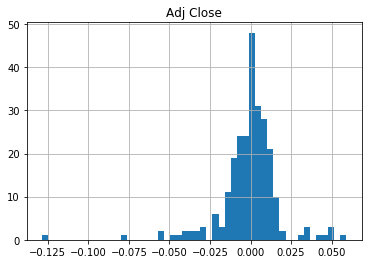

In [34]:
# Plot les changements de porcentage par jour
daily_pct_change_ibm.hist(bins = 50)
plt.show()

In [35]:
# Nous allons faire la même chose pour les autres entreprises

# Rendements par jour pour NVIDIA
daily_close_nvda = nvda[['Adj Close']]
daily_pct_change_nvda = daily_close_nvda.pct_change()
daily_pct_change_nvda.fillna(0, inplace = True)

# Rendements par jour pour INTEL
daily_close_intc = intc[['Adj Close']]
daily_pct_change_intc = daily_close_intc.pct_change()
daily_pct_change_intc.fillna(0, inplace = True)

# Rendements par jour pour QUALCOMM
daily_close_qcom = qcom[['Adj Close']]
daily_pct_change_qcom = daily_close_qcom.pct_change()
daily_pct_change_qcom.fillna(0, inplace = True)

# Rendements par jour pour AMD
daily_close_amd = amd[['Adj Close']]
daily_pct_change_amd = daily_close_amd.pct_change()
daily_pct_change_amd.fillna(0, inplace = True)

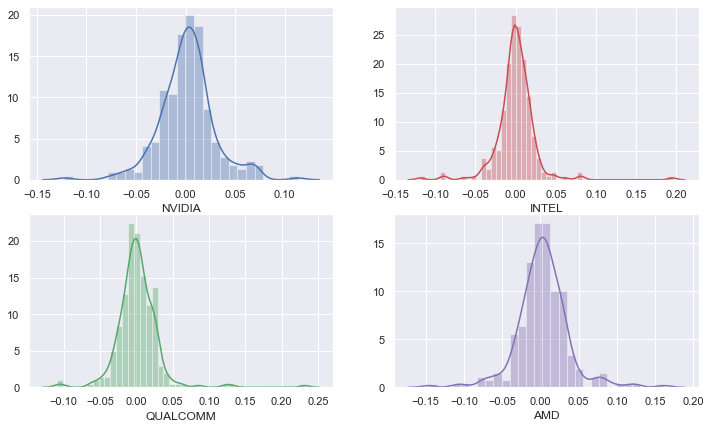

In [38]:
# Nous allons utiliser seaborn pour les subplots
import seaborn as sns
sns.set()

f, axes = plt.subplots(2, 2, figsize = (12, 7))

# Nous allons créer un histogramme et nous allons determiner les bins automatiquement

# NVIDIA
sns.distplot(daily_pct_change_nvda['Adj Close'], color = 'b', ax = axes[0,0], axlabel = 'NVIDIA');

# INTEL
sns.distplot(daily_pct_change_intc['Adj Close'], color = 'r', ax = axes[0,1], axlabel = 'INTEL');

# QUALCOMM
sns.distplot(daily_pct_change_qcom['Adj Close'], color = 'g', ax = axes[1,0], axlabel = 'QUALCOMM');

# AMD
sns.distplot(daily_pct_change_amd['Adj Close'], color = 'm', ax = axes[1,1], axlabel = 'AMD');

## Volatilité

In [40]:
# Calculer la volatilité

import numpy as np

min_periods = 75

vol = daily_pct_change_ibm.rolling(min_periods).std() * np.sqrt(min_periods)
vol.fillna(0, inplace = True)

vol.tail()

,Adj Close
Date,
2020-03-09,0.164580
2020-03-10,0.175338
2020-03-11,0.183219
2020-03-12,0.222942
2020-03-13,0.229081


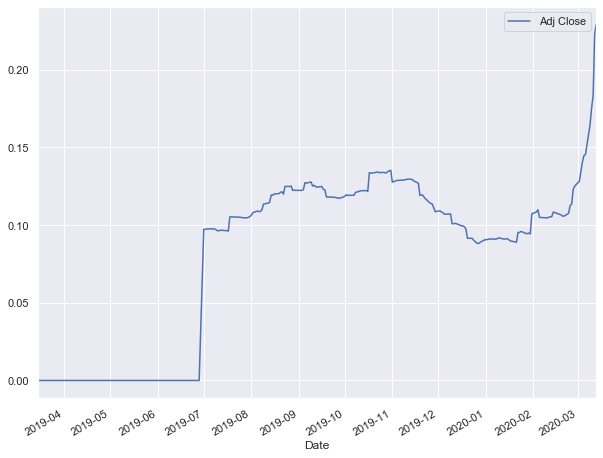

In [41]:
# Plot la volatilité

vol.plot(figsize = (10, 8))
plt.show()

### Rolling Means au lieu de variance va nous donner les tendances et la saisonnalité

### La variance nous donne un meilleur aperçu de la volatilité et la moyenne des tendances

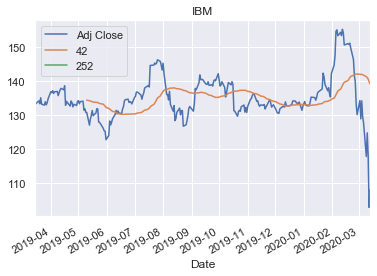

In [54]:
ibm_adj_close_px = ibm['Adj Close']

# Short moving window rolling mean / par mois
ibm['42'] = ibm_adj_close_px.rolling(window = 40).mean()

# Long moving window rolling mean / par année - on voit pas la ligne parce que nous avons plusieurs années
ibm['252'] = ibm_adj_close_px.rolling(window = 252).mean()

# Plot le Close Price ajousté, avec le Short et le Long Moving Window Means
ibm[['Adj Close', '42', '252']].plot(title = 'IBM')

plt.show()

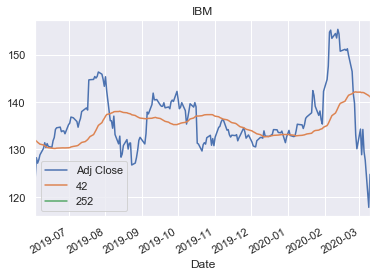

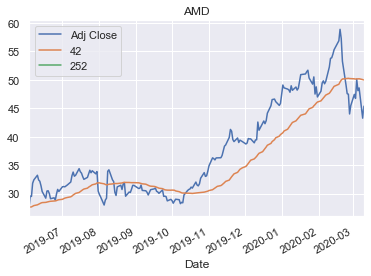

In [55]:
# Nous calculons la même chose pour AMD
amd_adj_close_px = amd['Adj Close']
amd['42'] = amd_adj_close_px.rolling(window = 40).mean()
amd['252'] = amd_adj_close_px.rolling(window = 252).mean()

# Plot IBM et AMD pour 9 mois
ibm['2019-06-01':'2020-03-10'][['Adj Close', '42', '252']].plot(title = 'IBM');
amd['2019-06-01':'2020-03-10'][['Adj Close', '42', '252']].plot(title = 'AMD');